In [193]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
from PIL import Image, ImageOps

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model, load_model

import matplotlib.pyplot as plt

TRAIN_DIR = r'C:\Users\Jairaj Pisupati\AppData\Roaming\SPB_16.6\Gods_Classification\God\God_train'
TEST_DIR = r'C:\Users\Jairaj Pisupati\AppData\Roaming\SPB_16.6\Gods_Classification\God\God_test'
IMG_SIZE = 50

In [194]:
def label_img(img):
    word_label = img.split('.')[-2]
    word_label=word_label[-8:] #for violent vs non-violent
#     word_label=word_label[-3:] #for cat vs dog
#     print(word_label)
    if word_label == '_violent': #checks if it is non-violent
        return [1,0]
    
    else:
        return [0,1]

In [195]:
def add_border(input_image, output_image, border, color=0):
    img = Image.open(input_image)

    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill=color)
    else:
        raise RuntimeError('Border is not an integer or tuple!')

    bimg.save(output_image)

In [196]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        if os.path.exists(path):
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            try:
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            except:
                print(path)
            training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [197]:
train = create_train_data()
train = np.load("train_data.npy", allow_pickle=True)

100%|██████████| 418/418 [00:02<00:00, 183.74it/s]


In [198]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        label = label_img(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        try:
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        except:
            print(path)
        testing_data.append([np.array(img),np.array(label)])
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [199]:
test = create_test_data()
test = np.load("test_data.npy", allow_pickle=True)
print(test[0])

100%|██████████| 126/126 [00:00<00:00, 197.39it/s]


[array([[124, 145, 155, ..., 175, 200, 210],
       [122, 152, 156, ..., 145, 193, 213],
       [131, 157, 162, ..., 209, 214, 216],
       ...,
       [139, 132, 123, ..., 110, 105, 209],
       [138, 137, 132, ..., 103,  28, 124],
       [123, 131, 117, ..., 105,  28,  20]], dtype=uint8)
 array([0, 1])]


In [242]:
train_list=os.listdir('C://Users//Jairaj Pisupati//AppData//Roaming//SPB_16.6//Gods_Classification//God//God_train//')
test_list=os.listdir('C://Users//Jairaj Pisupati//AppData//Roaming//SPB_16.6//Gods_Classification//God//God_test//')
train_X = np.empty([len(train_list), IMG_SIZE, IMG_SIZE, 1])
train_Y = np.empty([len(train_list), 2])
test_X = np.empty([len(test_list), IMG_SIZE, IMG_SIZE, 1])
test_Y = np.empty([len(test_list),2])

In [243]:
print(len(test_list))

126


In [244]:
for i in range(len(train)):
    try:
        train_X[i] = train[i][0].reshape(IMG_SIZE, IMG_SIZE, 1)
        train_Y[i] = train[i][1]
    except:
        print(i)

for i in range(len(test)):
    try:
        test_X[i] = test[i][0].reshape(IMG_SIZE, IMG_SIZE, 1)
        test_Y[i] = test[i][1]
    except:
        print(i)

In [245]:
def model(input_shape):
    
    X_input = Input(input_shape)

    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv0', padding='same')(X_input) #32 filters of 5*5 dimension
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool0', padding='same')(X)

    
    X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv1', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool1', padding='same')(X)
    
    
    X = Conv2D(128, (5, 5), strides = (1, 1), name = 'conv2', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool2', padding='same')(X)
    
        
    X = Conv2D(256, (5, 5), strides = (1, 1), name = 'conv3', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool3', padding='same')(X)
        
        
    X = Conv2D(128, (5, 5), strides = (1, 1), name = 'conv4', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool4', padding='same')(X)
    
    
    X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv5', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn5')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool5', padding='same')(X)
    
    
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv6', padding='same')(X)
    X = BatchNormalization(axis = 3, name = 'bn6')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((5, 5), name='max_pool6', padding='same')(X)
    
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1024, activation='relu', name='fc1')(X)
    X = Dropout(0.8)(X)
    
    X = Dense(2, activation='softmax', name='fc2')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Model')
    
    return model

In [246]:
model = model(train_X.shape[1:])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [254]:
model.fit(train_X, train_Y, epochs=30, shuffle=True, validation_data=(test_X, test_Y), verbose=2)

Train on 418 samples, validate on 126 samples
Epoch 1/30
 - 6s - loss: 0.2445 - acc: 0.8923 - val_loss: 0.5843 - val_acc: 0.7937
Epoch 2/30
 - 3s - loss: 0.2830 - acc: 0.8923 - val_loss: 0.1416 - val_acc: 0.9524
Epoch 3/30
 - 3s - loss: 0.1237 - acc: 0.9689 - val_loss: 0.0559 - val_acc: 1.0000
Epoch 4/30
 - 3s - loss: 0.0877 - acc: 0.9737 - val_loss: 0.5351 - val_acc: 0.8095
Epoch 5/30
 - 3s - loss: 0.1202 - acc: 0.9545 - val_loss: 2.6658 - val_acc: 0.4921
Epoch 6/30
 - 3s - loss: 0.1908 - acc: 0.9330 - val_loss: 0.2172 - val_acc: 0.8968
Epoch 7/30
 - 3s - loss: 0.1498 - acc: 0.9402 - val_loss: 0.1454 - val_acc: 0.9524
Epoch 8/30
 - 3s - loss: 0.0797 - acc: 0.9785 - val_loss: 0.5738 - val_acc: 0.7857
Epoch 9/30
 - 3s - loss: 0.1979 - acc: 0.9426 - val_loss: 2.2480 - val_acc: 0.5397
Epoch 10/30
 - 3s - loss: 0.2085 - acc: 0.9330 - val_loss: 1.5651 - val_acc: 0.5079
Epoch 11/30
 - 3s - loss: 0.1409 - acc: 0.9450 - val_loss: 0.6055 - val_acc: 0.6429
Epoch 12/30
 - 3s - loss: 0.1032 - acc:

In [255]:
model.save("model2.h5")

In [256]:
model = load_model("model2.h5")

In [257]:
predict = model.evaluate(test_X, test_Y, verbose=2)

print("loss = " + str(predict[0]))
print("accuracy = " + str(predict[1]))

loss = 0.016699558981354275
accuracy = 1.0


[[  5   8   8 ...   4   4   3]
 [  4   8   8 ...   4   8  19]
 [  4   8   8 ...  26  35  58]
 ...
 [175 182 174 ... 187 185 175]
 [177 178 172 ... 188 185 177]
 [176 178 166 ... 192 187 180]]


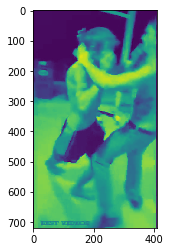

In [275]:
img_path = r'C:\Users\Jairaj Pisupati\AppData\Roaming\SPB_16.6\Gods_Classification\God\v4.jpg'
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

In [273]:
pred = model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 1))
if pred[0][0] > pred[0][1]:
    print("It's non_violent!")
#     in_img = img_path
#     word_label = in_img.split('.jpg')[-2]
#     word_label=word_label+"_classified.jpg"
#   add_border(in_img,output_image=word_label,border=100,color='green')
else:
    print("It's violent!")
#     in_img = img_path
#     word_label = in_img.split('.jpg')[-2]
#     word_label=word_label+"_classified.jpg"
#     add_border(in_img,output_image=word_label,border=100,color='red')
# img = cv2.imread(word_label,cv2.IMREAD_GRAYSCALE)
# plt.imshow(img

It's violent!


In [229]:
print(str(predict[0]))


0.4311917897254702


In [230]:
print(pred[0][1])


0.17152674


In [231]:
print(pred[0][0])

0.8284732


In [ ]:
print(np.array([1][0]))